<a href="https://colab.research.google.com/github/sbanerjee2020/Traderbot/blob/master/GDrive_101.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
!pip install -U -q PyDrive

#  This was the breakthrough https://stackoverflow.com/questions/49394737/exporting-data-from-google-colab-to-local-machine

In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from google.colab import files
from oauth2client.client import GoogleCredentials



In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [4]:
!ls -al  



total 28
drwxr-xr-x 1 root root 4096 Mar 30 23:13 .
drwxr-xr-x 1 root root 4096 Mar 30 23:11 ..
-rw-r--r-- 1 root root 2490 Mar 30 23:13 adc.json
drwxr-xr-x 1 root root 4096 Mar 30 23:13 .config
drwxr-xr-x 1 root root 4096 Mar 27 20:26 sample_data


In [5]:
drive

In [6]:
# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://googledrive.github.io/PyDrive/docs/build/html/index.html

# 2. Create & upload a file text file.
uploaded = drive.CreateFile({'title': 'Somnath_upload.txt'})
uploaded.SetContentString('Somnath Sample upload file content')
uploaded.Upload()
print('Uploaded file with ID {}'.format(uploaded.get('id')))

# 3. Load a file by ID and print its contents.
downloaded = drive.CreateFile({'id': uploaded.get('id')})
print('Downloaded content "{}"'.format(downloaded.GetContentString()))

Uploaded file with ID 1oUyfqOuvixZGCANux3iBBY9btseMcX17
Downloaded content "Somnath Sample upload file content"


#  PyDrive Documentation
https://pythonhosted.org/PyDrive/ 

In [7]:
for rand_seed in range(786,800):
    print(rand_seed)
 
    
    file = drive.CreateFile({'parents':[{u'id': '1m63jENcDTcn_ytUSTZSnjBksbDyhnAwH'}]}) 
    file.SetContentFile('eth_model_randseed_%d.h5'%rand_seed)
    file.Upload()
     
    file = drive.CreateFile({'parents':[{u'id': '1m63jENcDTcn_ytUSTZSnjBksbDyhnAwH'}]}) 
    file.SetContentFile('bt_model_randseed_%d.h5'%rand_seed)
    file.Upload()

786


IOError: ignored

In [0]:
file_list = drive.ListFile({'q': "'1m63jENcDTcn_ytUSTZSnjBksbDyhnAwH' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

In [0]:
!ls -al

total 2392
drwxr-xr-x 1 root root  4096 Mar 25 05:04 .
drwxr-xr-x 1 root root  4096 Mar 25 02:16 ..
-rw-r--r-- 1 root root 53888 Mar 25 02:40 bt_model_randseed_775.h5
-rw-r--r-- 1 root root 53888 Mar 25 02:46 bt_model_randseed_776.h5
-rw-r--r-- 1 root root 53904 Mar 25 02:51 bt_model_randseed_777.h5
-rw-r--r-- 1 root root 53920 Mar 25 02:56 bt_model_randseed_778.h5
-rw-r--r-- 1 root root 53920 Mar 25 03:02 bt_model_randseed_779.h5
-rw-r--r-- 1 root root 53920 Mar 25 03:07 bt_model_randseed_780.h5
-rw-r--r-- 1 root root 53920 Mar 25 03:12 bt_model_randseed_781.h5
-rw-r--r-- 1 root root 53920 Mar 25 03:18 bt_model_randseed_782.h5
-rw-r--r-- 1 root root 53920 Mar 25 03:23 bt_model_randseed_783.h5
-rw-r--r-- 1 root root 53920 Mar 25 03:28 bt_model_randseed_784.h5
-rw-r--r-- 1 root root 53920 Mar 25 03:34 bt_model_randseed_785.h5
-rw-r--r-- 1 root root 53920 Mar 25 04:11 bt_model_randseed_786.h5
-rw-r--r-- 1 root root 53920 Mar 25 04:16 bt_model_randseed_787.h5
-rw-r--r-- 1 root root 53920 

In [0]:
# Create a local file to upload.
with open('/tmp/sb_upload.txt', 'w') as f:
  f.write('somnath banerjee sample file')

print('/tmp/sb_upload.txt contains:')
!cat /tmp/sb_upload.txt

/tmp/sb_upload.txt contains:
somnath banerjee sample file

In [0]:
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

In [0]:
# Upload the file to Drive. See:
#
# https://developers.google.com/drive/v3/reference/files/create
# https://developers.google.com/drive/v3/web/manage-uploads
from googleapiclient.http import MediaFileUpload

file_metadata = {
  'name': 'Somnath_Sample_file',
  'mimeType': 'text/plain'
}
media = MediaFileUpload('/tmp/sb_upload.txt', 
                        mimetype='text/plain',
                        resumable=True)
created = drive_service.files().create(body=file_metadata,
                                       media_body=media,
                                       fields='id').execute()
print('File ID: {}'.format(created.get('id')))

File ID: 1cWxARMMMClq15nxkCejOaI1TItAHOdxw


In [0]:
{'parents':[{u'id': '1m63jENcDTcn_ytUSTZSnjBksbDyhnAwH'}]}

file_list = drive.ListFile({'q': "'1m63jENcDTcn_ytUSTZSnjBksbDyhnAwH' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

title: bt_model_randseed_777.h5, id: 1pH4k_WHolqZOawcocz-F5d90_CuE2Ptb
title: eth_model_randseed_777.h5, id: 1koVvNHYa8uPMvsdeF0qYJlwg7rkThmHt
title: bt_model_randseed_776.h5, id: 1f3vTYUKi8hvrvSO0HL3171Zdw-GHMZws
title: eth_model_randseed_776.h5, id: 1WwlG3iMiZaWpRma5lMrFtcdS2dtsuJGH
title: bt_model_randseed_775.h5, id: 1l8abb03Y4SY1AI8DXaYgyCO1F3Tb17as
title: eth_model_randseed_775.h5, id: 16_rEC50ipmC1zsT-RcLvT8CMA9jJT5vS


In [0]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))
  
  
#title: Colab Notebooks, id: 1GbhGa0BmeWBSk-nmvClh-VBGT-zyOuZ6

title: 02_Convolutional_Neural_Network.ipynb, id: 1wE6edS7-x25AFWdZQ6A83GC0DnNZabh0
title: 01_Simple_Linear_Model.ipynb, id: 1Ks8acd6cWW-FPTtvqP-j7V6MTHDSH9gd
title: Neural_Style_Transfer_Writabrata_ShataPriya, id: 13BQbNrm9Bl3I6XshN5zpVgpTf3Dw5qi4hvqalp7hmM4
title: Sample101.txt, id: 17K8nXX1eLufS8k6NitfUNIPaImM-zUY9
title: Steps To Be Happy, id: 17cAvbU2e_6pjXum3ztCQ1c-O4jTuQHOp_hoh9LcGvfQ
title: 6_Artistic_style_transfer_with_a_repurposed_VGG_Net_16.ipynb, id: 1SHGe_4A20Kbq1RrY9twMDtCZU7_nuLOg
title: Colab Notebooks, id: 1GbhGa0BmeWBSk-nmvClh-VBGT-zyOuZ6
title: NST_Sample_Progression, id: 1CLvtvzXrqMkKyp21Z0HuVKJIZbQB1B5n3LALhOpRMgc
title: NST_Samples, id: 1Q6shUCG_iZShyk6fa187ifu2yCRG_iODDiRBaOL50PQ
title: NST_Harker, id: 1wbuXe3Tm1meATbfOhw3WWeFzWLwaCZdNbJjnCk5yIEU
title: Neural_Style_Transfer_BIZ, id: 1Kru9Iyemymns18LsO7TU0sHsYgonzMZpEFEJaAqRvow
title: Deep Learning, id: 1yOfrbFONv_rFInbktYwkRk5AzdOuLiFB0wV7VZ5oQ1E
title: CryptoCurrencyDeck.odp, id: 0B8PbYNtaPspKYXI2TFpGdENwaWtjS

In [0]:
# https://stackoverflow.com/questions/48593496/importing-keras-models-into-colaboratory-from-google-drive

In [0]:
# Download the '.h5' file from google drive

file_id = '1uBtlaggVyWshwcyP6kEI-y_W3P8D26sz'

import io
from io import BytesIO   
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  status, done = downloader.next_chunk()
  if status:
      print("Download %%%d%%." % int(status.progress() * 100))
  print("Download Complete!")

downloaded.seek(0)

print('Downloaded file contents are: {}'.format(downloaded.read()))

In [0]:
with open('/tmp/model.h5', 'wb') as f:
    f.write(downloaded.read())

In [0]:
!pip install -U -q PyDrive



In [0]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# 1. Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# PyDrive reference:
# https://googledrive.github.io/PyDrive/docs/build/html/index.html

# 2. Create & upload a file text file.
#uploaded = drive.CreateFile({'title': 'Sample103.txt', "parents": [{"kind": "drive#fileLink", "id": "1ir5HiIa8A92wWsq8orwIGwdI_BzgD7Ki"}]})
#uploaded.SetContentString('Somnaths sample upload file content in 2018 GDrive')
#uploaded.Upload()
#print('Uploaded file with ID {}'.format(uploaded.get('id')))

# 3. Load a file by ID and print its contents.
#downloaded = drive.CreateFile({'id': uploaded.get('id')})
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

In [0]:
#https://drive.google.com/file/d/1gfvlUM0qS4REDMWd2ShVgxfEaWW-1pQv/view?usp=sharing

#downloaded = drive.CreateFile({'id': "1DzpAdi8Sk1HNjMGoRXp6qhagpJAY8lab"})

file2 = drive.CreateFile({'id': "1gfvlUM0qS4REDMWd2ShVgxfEaWW-1pQv"})
print('title: %s, mimeType: %s' % (file2['title'], file2['mimeType']))
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

obj = file2.GetContentFile('catlove.png')
#obj = file2.FetchContent(file2.mimetype)
print(file2)

#file2.GetContentFile('starry_night_3.png')


title: starry_night.jpg, mimeType: image/jpeg
GoogleDriveFile({u'mimeType': u'image/jpeg', u'lastViewedByMeDate': u'2018-03-19T05:34:31.189Z', u'appDataContents': False, u'thumbnailLink': u'https://lh3.googleusercontent.com/RMhC5ineIecFWAhezdo-9lr3rnDUGWDAmhJN3XGHbXmGxzHwIfcRQSyGoWqLiOzfoWkhX-FO1qY=s220', u'labels': {u'restricted': False, u'starred': False, u'viewed': True, u'hidden': False, u'trashed': False}, u'explicitlyTrashed': False, u'etag': u'"z_YVnINIY56ukYDqXpOL80gtv44/MTUyMTQzNjgwNjQwNQ"', u'lastModifyingUserName': u'Somnath Banerjee', u'writersCanShare': True, u'owners': [{u'picture': {u'url': u'https://lh3.googleusercontent.com/-37y8lMru5R4/AAAAAAAAAAI/AAAAAAAAAlw/-cnUxomkoqI/s64/photo.jpg'}, u'kind': u'drive#user', u'displayName': u'Somnath Banerjee', u'permissionId': u'15117587335140172496', u'isAuthenticatedUser': True, u'emailAddress': u'sbanerjee2005@gmail.com'}], 'id': u'1gfvlUM0qS4REDMWd2ShVgxfEaWW-1pQv', u'lastModifyingUser': {u'picture': {u'url': u'https://lh3.goo

In [0]:
print(file2['webContentLink'])

https://drive.google.com/uc?id=1gfvlUM0qS4REDMWd2ShVgxfEaWW-1pQv&export=download


In [0]:
print(file2['embedLink'])

https://drive.google.com/file/d/1gfvlUM0qS4REDMWd2ShVgxfEaWW-1pQv/preview?usp=drivesdk


In [0]:
import scipy

In [0]:
from googleapiclient.discovery import build
drive_service = build('drive', 'v3')

In [0]:
file_id = '1gfvlUM0qS4REDMWd2ShVgxfEaWW-1pQv'

import io
from googleapiclient.http import MediaIoBaseDownload

request = drive_service.files().get_media(fileId=file_id)
downloaded = io.BytesIO()
downloader = MediaIoBaseDownload(downloaded, request)
done = False
while done is False:
  # _ is a placeholder for a progress object that we ignore.
  # (Our file is small, so we skip reporting progress.)
  _, done = downloader.next_chunk()

downloaded.seek(0)
#print('Downloaded file contents are: {}'.format(downloaded.read()))

0L

In [0]:
def get_img(src, img_size=False):
   img = scipy.misc.imread(src, mode='RGB') # misc.imresize(, (256, 256, 3))
   if not (len(img.shape) == 3 and img.shape[2] == 3):
       img = np.dstack((img,img,img))
   if img_size != False:
       img = scipy.misc.imresize(img, img_size)
   return img

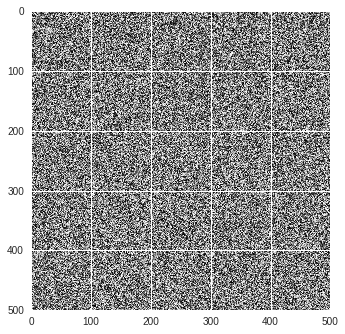

In [0]:
import numpy as np
from matplotlib import pyplot as plt

random_image = np.random.random([500, 500])

plt.imshow(random_image, cmap='gray', interpolation='nearest');

In [0]:
def PIL2array(img):
    return np.array(img.getdata(),
                    numpy.uint8).reshape(img.size[1], img.size[0], 3)

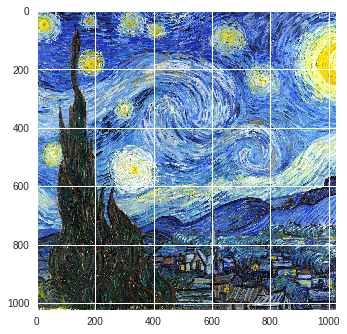

In [0]:
from scipy.misc import imshow
from PIL import Image
import numpy as np

#my_img = PIL2array(downloaded)

my_img = Image.open(downloaded)

plt.imshow(my_img, cmap='gray', interpolation='nearest');



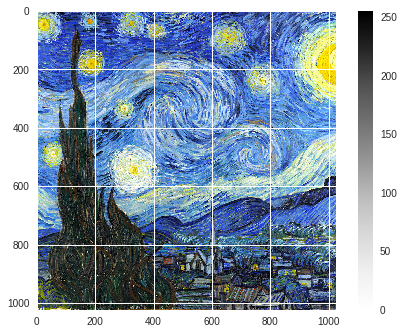

In [0]:
#arr = np.array(my_img)[:,:,0]

imgplot = plt.imshow(my_img)
plt.colorbar()

ValueError: ignored

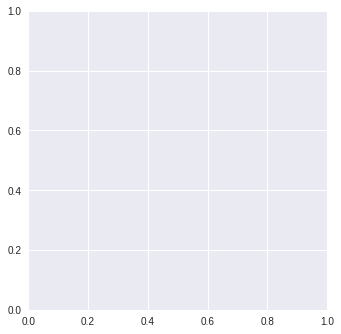

In [0]:
plt.imshow(arr, cmap='RGB', interpolation='nearest');

TypeError: ignored

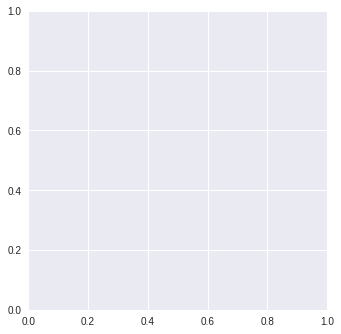

In [0]:
from matplotlib import pyplot as plt
plt.imshow(downloaded.read(), interpolation='nearest')
plt.show()

In [0]:
import numpy as np
import urllib
import cv2

In [0]:
def url_to_image(url):
	# download the image, convert it to a NumPy array, and then read
	# it into OpenCV format
	resp = urllib.urlopen(url)
	image = np.asarray(bytearray(resp.read()), dtype="uint8")
	image = cv2.imdecode(image, cv2.IMREAD_COLOR)
 
	# return the image
	return image

In [0]:
URL = file2['embedLink']
print(URL)

https://drive.google.com/file/d/1gfvlUM0qS4REDMWd2ShVgxfEaWW-1pQv/preview?usp=drivesdk


In [0]:

URL = file2['embedLink']

#URL = 'https://tse2.mm.bing.net/th?id=OIP.yyIad8mjS_1DzlJZOV-fgAHaEo&w=300&h=187&c=7&o=5&dpr=2&pid=1.7'

image = url_to_image (URL)
print(image)

#cv2.imshow("Image", image)
#cv2.waitKey(0)

None


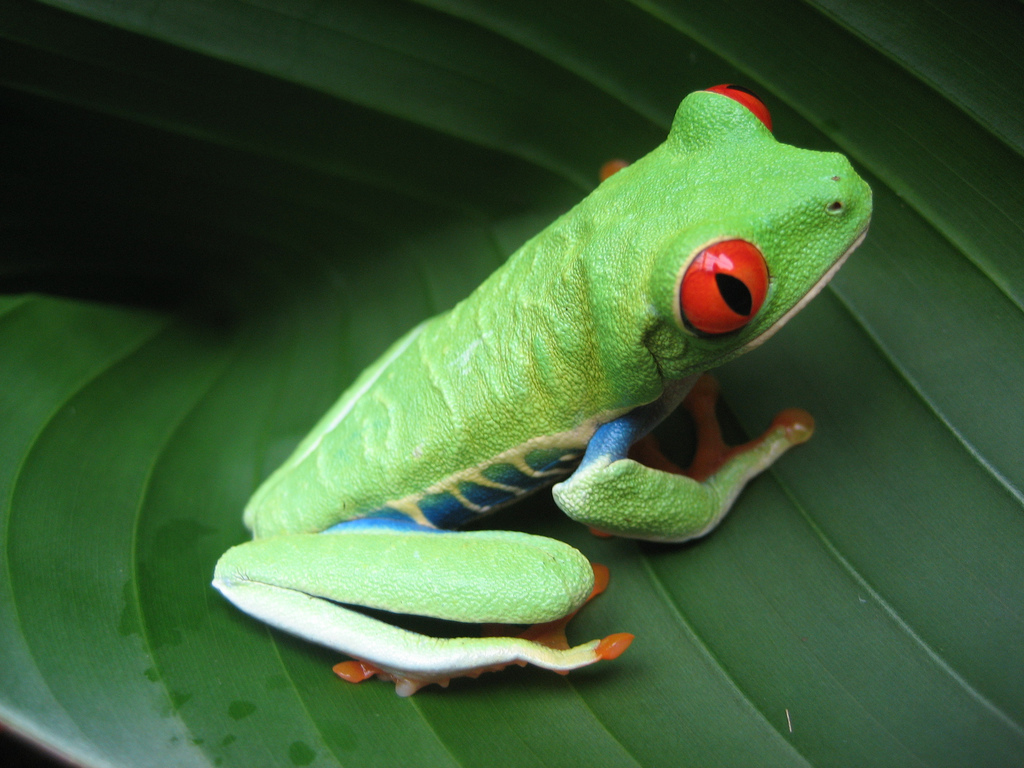

In [0]:

from PIL import Image
import requests


height = 512
width = 512

content_image = Image.open(requests.get('https://www.dropbox.com/s/o0d4zkqjv1k0acv/Costa%20Rican%20Frog.jpg?dl=1', stream=True).raw)

content_image

In [0]:
import scipy.misc, numpy as np, os, sys

In [0]:
def get_img(src, img_size=False):
   img = scipy.misc.imread(src, mode='RGB') # misc.imresize(, (256, 256, 3))
   if not (len(img.shape) == 3 and img.shape[2] == 3):
       img = np.dstack((img,img,img))
   if img_size != False:
       img = scipy.misc.imresize(img, img_size)
   return img



In [0]:
file2 = drive.CreateFile({'id': "1gfvlUM0qS4REDMWd2ShVgxfEaWW-1pQv"})
print('title: %s, mimeType: %s' % (file2['title'], file2['mimeType']))
#print('Downloaded content "{}"'.format(downloaded.GetContentString()))

obj = file2.FetchContent(file2)
print(obj)

get_img('https://www.dropbox.com/s/o0d4zkqjv1k0acv/Costa%20Rican%20Frog.jpg?dl=1')

IOError: ignored

In [0]:
file2

GoogleDriveFile({u'mimeType': u'image/jpeg', u'lastViewedByMeDate': u'2018-03-19T05:34:31.189Z', u'appDataContents': False, u'thumbnailLink': u'https://lh3.googleusercontent.com/FpKinB_CcbfSbFGBo9hNVulhVMk72JNHvHxRSzcB3TDFH-5FaI2ivJK5fI-qHGd1yvR5xNotI7k=s220', u'labels': {u'restricted': False, u'starred': False, u'viewed': True, u'hidden': False, u'trashed': False}, u'explicitlyTrashed': False, u'etag': u'"z_YVnINIY56ukYDqXpOL80gtv44/MTUyMTQzNjgwNjQwNQ"', u'lastModifyingUserName': u'Somnath Banerjee', u'writersCanShare': True, u'owners': [{u'picture': {u'url': u'https://lh3.googleusercontent.com/-37y8lMru5R4/AAAAAAAAAAI/AAAAAAAAAlw/-cnUxomkoqI/s64/photo.jpg'}, u'kind': u'drive#user', u'displayName': u'Somnath Banerjee', u'permissionId': u'15117587335140172496', u'isAuthenticatedUser': True, u'emailAddress': u'sbanerjee2005@gmail.com'}], 'id': u'1gfvlUM0qS4REDMWd2ShVgxfEaWW-1pQv', u'lastModifyingUser': {u'picture': {u'url': u'https://lh3.googleusercontent.com/-37y8lMru5R4/AAAAAAAAAAI/AA